<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.983 · Aprenentage per reforç</p>
<p style="margin: 0; text-align:right;">2024-1 · Màster universitari en Ciència de dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nom i cognoms:</strong> Xavier Maltas Tarridas
</div>

# PAC 1 - Solucions tabulars

En aquesta pràctica implementarem els diferents mètodes d'aprenentatge per reforç estudiats als Blocs I i II del curs. En concret, ens centrarem en la definició d'un entorn i implementarem els diferents mètodes per buscar una solució òptima del problema.

**<u>Important</u>: El lliurament s'ha de fer en format notebook i en format html on es vegi el codi, els resultats i comentaris de cada exercici. És a dir, s'han de lliurar dos fitxers: un amb extensió .ipynb i un altre .html. Per exportar el notebook a html pot fer-se des del menú File $\to$ Download as $\to$ HTML. A més s'han de lliurar els 2 arxius que es modificaran dins de la carpeta <code>\gym_gridworlds</code>, els arxius <code>gridworld.py</code> i <code>\_\_init\_\_.py</code>.**


## 1. L'entorn __Gym-Gridworlds__ (1 punt)

L'entorn __Gym-Gridworlds__ és un entorn de tercers que es troba referenciat a la web de Gymnasium, concretament a l'apartat 'ENVIRONMENTS/External Environments'.

L'entorn consisteix en un agent que es mou en una quadrícula de dimensions configurables. La classe per defecte `Gridworld` implementa una tasca "anar a l'objectiu" on l'agent té cinc accions (esquerra, dreta, amunt, avall, romandre al lloc) i una funció de transició predeterminada (seleccionar l'acció "romandre al lloc" als estats objectiu acaba l'episodi).

El codi i la documentació es troba a https://github.com/sparisi/gym_gridworlds

Es recomana llegir atentament la pàgina per familiaritzar-se amb l'entorn.

**<u>Nota</u>: L'entorn utilitzat té un mode de renderitzat <code>render\_mode = "human"</code> que permet observar la quadrícula i el moviment de l'agent en una pantalla adicional utiltzant el paquet <code>pygame</code> de python. Aquest mode de renderitzat només funciona en local. Per a poder executar el codi sense problemes es proporciona un arxiu <code>environment.yml</code> perquè pugueu crear un entorn virtual amb els paquets necessaris.**

Començarem carregant un dels múltiples entorns pre-dissenyats i veurem les seves principals característiques, executant un episodi de prova.

### 1.1. Càrrega de dades (0.5 punts)

El següent codi carrega els paquets necessaris per a l'exemple.

Comencem instal·lant Gymnasium (això només s'ha de fer una vegada si no ho teniu instal·lat ja).

In [1]:
!pip install gymnasium==1.0.0

In [2]:
import gymnasium as gym
print("La versió de Gymnasium utilitzada en aquesta PAC és la 1.0.0, comprova-ho a continuació")
print("Gymnasium Version:", gym.__version__) # 0.28.1

La versió de Gymnasium utilitzada en aquesta PAC és la 1.0.0, comprova-ho a continuació
Gymnasium Version: 1.0.0


A continuació clonem el repositori de l'entorn (això només s'ha de fer una vegada).

In [3]:
!git clone https://github.com/sparisi/gym_gridworlds.git

fatal: destination path 'gym_gridworlds' already exists and is not an empty directory.


Entrem dins del directori `gym_gridworlds` i l'instal·lem en mode editable (això només s'ha de fer una vegada).

In [4]:
%cd gym_gridworlds
!pip install -e .

C:\Users\xavim\Desktop\myRepos\ReinforcementLearning\PAC1\gym_gridworlds
Obtaining file:///C:/Users/xavim/Desktop/myRepos/ReinforcementLearning/PAC1/gym_gridworlds
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: Gym-Gridworlds
    Found existing installation: Gym-Gridworlds 1.0
    Uninstalling Gym-Gridworlds-1.0:
      Successfully uninstalled Gym-Gridworlds-1.0
  Running setup.py develop for Gym-Gridworlds


Importem els paquets necessaris per la resta de la PAC

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
import sys
import time
import gym_gridworlds

Creem l'entorn mitjançant la instanciació d'un objecte de classe `Gridworld` (en executar la instrucció `env = gym.make("Gym-Gridworlds/Full-4x5-v0", render_mode="human")`) i imprimim per pantalla el tipus de l'espai d'accions i de l'espai d'observacions.

In [6]:
env = gym.make("Gym-Gridworlds/Full-4x5-v0", render_mode="human")
env.reset()
env.render()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Discrete(20) 


L'entorn generat té el següent aspecte (comprovar-ho a la finestra emergent de <code>pygame</code> que es genera a l'executar <code>env.render()</code>):
<br><br>
<img src="images/Gym-Gridworld_4x5.png" alt="Mi imagen" style="display: block; margin-left: auto; margin-right: auto;">

En aquest entorn podem veure una sèrie de caselles i figures que es descriuen a continuació:

<ul>
  <li>Les caselles negres són buides.</li>
  <li>Les caselles negres amb fletxes grises són caselles on l'agent només es pot moure en una direcció (les altres accions fallaran).</li>
  <li>Les caselles vermelles donen recompenses negatives (com més brillants, més negatives).</li>
  <li>Les caselles verdes donen recompenses positives (com més brillants, més altes).</li>
  <li>Les caselles grogues són arenes movedisses, on totes les accions fallaran amb un 90% de probabilitat.</li>
  <li>L'agent és el cercle blau.</li>
</ul>

A més, hi ha altres tipus de caselles:

<ul>
  <li>Les caselles blanques són pous (caminar-hi comporta una gran recompensa negativa i l'episodi acaba).</li>
  <li>Les caselles porpres són parets (l'agent no hi pot passar).</li>
  <li>Una fletxa taronja indica l'última acció de l'agent.</li>
  <li>Un punt taronja indica que l'agent no va intentar moure's amb la seva última acció.</li>
</ul>



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 1.1</strong> (0.5 pts)

Analitzar la [documentació](https://github.com/sparisi/gym_gridworlds) i el codi de l'entorn que es troba a <code>\gym_gridworlds\gridworld.py</code> per respondre a les següents preguntes:
<ul>    
    <li>Descriure l'espai d'accions de l'entorn: quantes accions hi ha? a què correspòn cadascuna d'elles?</li>
    <li>Quina és la casella inicial? Es pot canviar?</li>
</ul></div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br>
    
    
<h2>Espai d'accions de l'entorn</h2>
<p><strong>Quantes accions hi ha?</strong></p>
<p>L'espai d'accions és discret amb un total de 5 accions, representades per nombres enters en el rang <code>{0, 1, 2, 3, 4}</code>.</p>

<p><strong>A què correspon cadascuna d'elles?</strong></p>
<ul>
  <li><code>0</code>: Moure's a l'esquerra (LEFT)</li>
  <li><code>1</code>: Moure's cap avall (DOWN)</li>
  <li><code>2</code>: Moure's a la dreta (RIGHT)</li>
  <li><code>3</code>: Moure's cap amunt (UP)</li>
  <li><code>4</code>: Quedar-se quiet (STAY)</li>
</ul>

    
    
<h2>Casella inicial</h2>
<p><strong>Quina és la casella inicial?</strong></p>
<p>Per defecte, en aquest entorn, la casella inicial és la cantonada superior esquerra <code>(0, 0)</code>.</p>

<p><strong>Es pot canviar?</strong></p>
<p>Sí, és possible canviar la casella inicial. Pots utilitzar classes predefinides com <code>GridworldMiddleStart</code> per començar al centre, o <code>GridworldRandomStart</code> per una posició aleatòria.</p>
</div>

### 1.2. Execució d'un episodi (0.5 punts)

A continuació, realitzarem l'execució d'un episodi de l'entorn *Gym-Gridworlds/Full-4x5-v0* utilitzant un agent que selecciona les accions de forma aleatòria.
  

In [7]:
# Inicialitzem l'entorn
obs, info = env.reset()
t, total_reward, terminated, truncated = 0, 0, False, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "Left",
        1: "Down",
        2: "Right",
        3: "Up",
        4: "Stay",
    }
done = False
while not done:

    # Triar una acció aleatòria (aquesta és la implementació de l'agent)
    action = env.action_space.sample()

    # Executar l'acció i esperar la resposta de l'entorn
    new_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # Imprimir time-step
    print("Step {}. Action: {} -> Obs: {} and reward: {}. Terminated {}. Truncated {}.".format(t+1, switch_action[action], new_obs, reward, terminated, truncated))

    # Actualitzar variables
    obs = new_obs
    total_reward += reward
    t += 1
    time.sleep(0.5) #S'afegeix per alentir el renderitzat i poder apreciar els moviments de l'agent

print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))

Obs inicial: 0 
Step 1. Action: Stay -> Obs: 0 and reward: 0.0. Terminated False. Truncated False.
Step 2. Action: Right -> Obs: 1 and reward: 0.0. Terminated False. Truncated False.
Step 3. Action: Stay -> Obs: 1 and reward: 0.0. Terminated False. Truncated False.
Step 4. Action: Left -> Obs: 0 and reward: 0.0. Terminated False. Truncated False.
Step 5. Action: Up -> Obs: 0 and reward: 0.0. Terminated False. Truncated False.
Step 6. Action: Up -> Obs: 0 and reward: 0.0. Terminated False. Truncated False.
Step 7. Action: Up -> Obs: 0 and reward: 0.0. Terminated False. Truncated False.
Step 8. Action: Down -> Obs: 5 and reward: 0.0. Terminated False. Truncated False.
Step 9. Action: Left -> Obs: 5 and reward: 0.0. Terminated False. Truncated False.
Step 10. Action: Down -> Obs: 10 and reward: 0.0. Terminated False. Truncated False.
Step 11. Action: Stay -> Obs: 10 and reward: 0.0. Terminated False. Truncated False.
Step 12. Action: Up -> Obs: 10 and reward: 0.0. Terminated False. Trunca

Es recomana analitzar el codi anterior, executar-lo vàries vegades i observar el renderitzat en la finestra emergent externa abans de contestar el següent exercici.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 1.2</strong> (0.5 pts)

<!-- Una vegada executat l'episodi, i en base a l'anàlisi de la documentació i del codi de l'entorn respondre a les següents preguntes: -->
<ul> 
    <li>Descriure l'espai d'estats: en què consisteixen els estats? com es codifiquen per defecte?</li>
    <li>Descriure el senyal de recompensa: quins valors pot prendre? en quines situacions es rep cada valor?</li>
    <li>Quan finalitza un episodi?</li>
</ul></div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br>

    
<h2>Espai d'estats</h2>
<p><strong>En què consisteixen els estats</strong></p>
<p>L'espai d'estats en l'entorn "Gym-Gridworlds/Full-4x5-v0" es basa en la posició de l'agent dins d'una graella de 4x5. Cada estat es troba representat segons la posició de l'agent a la graella, la qual es descriu mitjançant un conjunt de coordenades <code>(x,y)</code>, on <code>x</code> és la fila i <code>y</code> és la columna de la graella.</p>

<p><strong>Com es codifiquen per defecte?</strong></p>
    <p>Cada estat es codifica mitjançant una parella coordenades representades per nombres enters <code>(x,y)</code>. La <code>x</code> és la fila (entre 0 i 3) i <code>y</code> és la columna (entre 0 i 4) de la graella. Això permet representar fins a 20 possibles estats (4 files * 5 columnes).</p>
    
<h2>Senyal de recompensa</h2>
<p><strong>Quins valors pot prendre?</strong></p>
<ul>
  <li><strong>+1</strong>: Recompensa màxima per arribar a la casella d'objectiu (<code>GOOD</code>) i executar l'acció <code>STAY</code>.</li>
  <li><strong>+0.1</strong>: Recompensa menor per arribar a una casella de distracció (<code>GOOD_SMALL</code>) i executar l'acció <code>STAY</code>.</li>
  <li><strong>-10</strong>: Penalització per moure's a una casella de penalització gran (<code>BAD</code>).</li>
  <li><strong>-0.1</strong>: Penalització menor per moure's a una casella de penalització menor (<code>BAD_SMALL</code>).</li>
  <li><strong>-100</strong>: Penalització severa per caure en una casella de <forat (<code>PIT</code>).</li>
  <li><strong>0</strong>: Recompensa nul·la en caselles buides (<code>EMPTY</code>) o si l'agent xoca amb una <em>paret</em> (<code>WALL</code>).</li>
</ul>

<p><strong>En quines situacions es rep cada valor?</strong></p>
<ul>
  <li><strong>+1</strong>: Quan l'agent arriba a l'objectiu principal (<code>GOOD</code>) i tria quedar-se quiet (<code>STAY</code>).</li>
  <li><strong>+0.1</strong>: Quan l'agent arriba a un objectiu distractor(<code>GOOD_SMALL</code>) i tria quedar-se quiet (<code>STAY</code>).</li>
  <li><strong>-10</strong>: Quan l'agent entra en una casella amb penalització gran (<code>BAD</code>).</li>
  <li><strong>-0.1</strong>: Quan l'agent es mou cap a una casella amb penalització menor (<code>BAD_SMALL</code>).</li>
  <li><strong>-100</strong>: Quan l'agent cau en una casella de forat (<code>PIT</code>), finalitzant l'episodi.</li>
  <li><strong>0</strong>: Quan l'agent es mou a una casella buida (<code>EMPTY</code>) o xoca amb una paret (<code>WALL</code>), o si no es queda quiet després d'arribar a un objectiu (<code>GOOD</code> o <code>GOOD_SMALL</code>).</li>
</ul>

    
    
    
    
<h2>Finalització de l'episodi</h2>
<p><strong>Quan finalitza un episodi?</strong></p>
<p>
  L'episodi es completa en les situacions següents:
  <ul>
    <li>Quan l'agent arriba a la casella d'objectiu (<em>GOOD</em>) i executa l'acció <em>STAY</em>, rebent una recompensa de +1.</li>
    <li>Quan l'agent cau en una casella de forat (<em>PIT</em>), rebent una penalització de -100.</li>
  </ul>
</p>


<h2>Finalització de l'episodi</h2>
<p><strong>Quan finalitza un episodi?</strong></p>
<ul>
  <li>L'episodi es finalitza immediatament si l'agent rep una recompensa de <strong>+1</strong> en arribar a la casella objectiu principal (<code>GOOD</code>) i executar l'acció <code>STAY</code>.</li>
  <li>També finalitza si l'agent cau en una casella de forat (<code>PIT</code>) i rep una recompensa de <strong>-100</strong>.</li>
</ul>
    

    
</div>

Tanquem l'entorn perquè als següents apartats en crearem un de nou

In [8]:
env.close()

## 2. Creació d'un entorn propi (1,5 punts)

L'entorn *Gym-Gridworld* té diversos arguments que poden ser modificats:

* La dimensió de la quadrícula.
* El tipus de cada casella.
* La posició de les caselles de sortida i d'arribada.
* ...

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.1</strong> (0,75 punts)

Crear un entorn nou com el que es descriu a continuació:

<ul>
  <li>Graella 4x4</li>
  <li>Les 4 caselles centrals son de tipus paret (color porpra).</li>
  <li>Casella d'inici a dalt a l'esquerra (posició per defecte).</li>
  <li>Casella final (color verd brillant) a baix a la dreta.</li>
  <li>La casella de la dreta del tot de la primera fila que sigui amb penalització gran (color vermell brillant).</li>
  <li>La resta de caselles, en comptes de ser normals (color negre) posar-les amb una petita penalització (color vermell fosc).</li>
</ul>

Per a realitzar l'entorn:
<ul>
  <li>Heu d'afegir la graella al diccionari <code>GRIDS</code> de l'arxiu <code>\gym_gridworlds\gridworld.py</code> (utilitzeu com a clau de l'entrada al diccionari <code>"4X4_Ex2"</code>.)</li>
  <li>Heu de registrar l'entorn a l'arxiu <code>\gym_gridworlds\__init__.py</code> amb les següents dades:</li>
      <ul>
          <li><code>id="Gym-Gridworlds/Ex2-4x4-v0"</code></li>
          <li><code>entry_point="gym_gridworlds.gridworld:Gridworld"</code></li>
          <li><code>max_episode_steps=100</code></li>
          <li><code>kwargs={"grid": "4X4_Ex2",}</code></li>
       </ul>
</ul>
</div>

Una vegada afegit i registrat el nou entorn re-inicieu el kernel del Notebook per a que es pugui carregar i executar.

Si tot ha anat bé, després d'executar el següent codi, hauríeu d'obtenir un entorn amb el següent aspecte:
<br><br>
<img src="images/Gym-Gridworld_Ex2_4x4.png" alt="Mi imagen" style="display: block; margin-left: auto; margin-right: auto;">



In [9]:
import gym_gridworlds
env = gym.make("Gym-Gridworlds/Ex2-4x4-v0", render_mode="human")
env.reset()
env.render()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Discrete(16) 


```
#gridworld.py
#new grid

GRIDS = {

    "4X4_Ex2": [
        [BAD_SMALL, BAD_SMALL, BAD_SMALL, BAD],
        [BAD_SMALL, WALL, WALL, BAD_SMALL],
        [BAD_SMALL, WALL, WALL, BAD_SMALL],
        [BAD_SMALL, BAD_SMALL, BAD_SMALL, GOOD],
    ],

}
```

```
#__init__.py
#Register env

register(
    id="Gym-Gridworlds/Ex2-4x4-v0",
    entry_point="gym_gridworlds.gridworld:Gridworld",
    max_episode_steps=100,
    kwargs={"grid": "4X4_Ex2"},
)
```

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.2</strong> (0,25 punts)

A continuació, implementar un agent que dugui a terme una política aleatòria. Comprovar que les caselles visitades i les recompenses rebudes es corresponen amb les accions i l'entorn programat.

Mostrar la trajectòria seguida per l'agent. No cal graficar-la, tan sols mostrar les accions i les caselles visitades en ordre i les recompenses rebudes.

Mostrar també el nombre de *steps* i la recompensa total acumulada.
</div>

In [10]:
# Inicialitzem l'entorn
obs, info = env.reset()
t, total_reward, terminated, truncated = 0, 0, False, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "Left",
        1: "Down",
        2: "Right",
        3: "Up",
        4: "Stay",
    }

Obs inicial: 0 


In [11]:
######################## SOLUCIÓ ###########################
import gymnasium as gym

# List to store the trajectory
trajectory = []

# Interaction loop with the environment
while not (terminated or truncated):
    # Select a random action
    action = env.action_space.sample()
    
    # Execute the action and get new observations and rewards
    next_obs, reward, terminated, truncated, info = env.step(action)
    
    # Store the information of the performed action
    trajectory.append({
        "step": t + 1,
        "action": switch_action[action],
        "obs": next_obs,
        "reward": reward
    })
    
    # Update reward variables and step count
    total_reward += reward
    t += 1
    
    # Display information of the current step
    print(f"Step {t}: Action: {switch_action[action]}, Obs: {next_obs}, Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}")
    time.sleep(0.25)
    
# Display the final summary
print("\n--- Episode Summary ---")
print(f"Total number of steps: {t}")
print(f"Total reward: {total_reward}")

Step 1: Action: Down, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 2: Action: Right, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 3: Action: Right, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 4: Action: Stay, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 5: Action: Down, Obs: 8, Reward: -0.1, Terminated: False, Truncated: False
Step 6: Action: Left, Obs: 8, Reward: -0.1, Terminated: False, Truncated: False
Step 7: Action: Up, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 8: Action: Right, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 9: Action: Down, Obs: 8, Reward: -0.1, Terminated: False, Truncated: False
Step 10: Action: Right, Obs: 8, Reward: -0.1, Terminated: False, Truncated: False
Step 11: Action: Up, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 12: Action: Down, Obs: 8, Reward: -0.1, Terminated: False, Truncated: False
Step 13: Action: Down, Obs: 12, Rewar

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta</strong>
Quin pot ser l'ojectiu d'utilitzar caselles de collor vermell fosc (amb una petita penalització) en comptes de caselles negres (sense penalització) en l'entrenament dels agents?
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>

1. **Eficiència**: A l'utilitzar penalitzacions petites es fomenta que l'agent eviti trajectòries ineficients. En lloc de moure's aleatòriament sense cap conseqüència, l'agent aprèn a minimitzar el cost acumulat per arribar a la meta/objectiu trobant la ruta més curta i eficient. 

    

2. **Simular entorn més realista**: En molts escenaris del món real, moure's per un espai té un cost associat (consum d'energia, temps o altres recursos). En fer ús de petites penalitzacions per a les caselles normals pot ajudar a simular aquestes condicions, fent que l'agent aprengui a prendre decisions més realistes.

    

3. **Millorar l'aprenentatge**: Les petites penalitzacions poden proporcionar un senyal d'aprenentatge de major riquesa, ajudant l'agent a diferenciar entre accions lleugerament millors o pitjors. Això pot accelerar el procés d'aprenentatge i millorar la qualitat  de les polítiques apreses.

    

4. **Exploració controlada**: Fer ús de penalitzacions petites pot ajudar a controlar l'exploració de l'agent, fent que eviti certes àrees de l'entorn que no són òptimes. 

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.3</strong> (0,5 punts)

A continuació, implementar un agent que dugui a terme la política òptima determinista, és a dir, que partint de la casella inicial [0,0] arribi a la casella final (de color verd brillant) amb la màxima recompensa acumulada. Quin és el valor del nombre de passos mínims? Quin és el retorn obtingut?

Mostra la trajectòria seguida per l'agent i el retorn obtingut. No cal graficar-la, tan sols mostrar les accions i les caselles visitades en ordre i el retorn (recompensa total acumulada).

Comenta els resultats.

</div>

In [12]:
# Inicialitzem l'entorn
obs, info = env.reset()
t, total_reward, terminated, truncated = 0, 0, False, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "Left",
        1: "Down",
        2: "Right",
        3: "Up",
        4: "Stay",
    }

Obs inicial: 0 


In [13]:
######################## SOLUCIÓ ###########################
import gymnasium as gym

# Optimal deterministic policy to reach the final cell with maximum reward
optimal_policy = [
    (1, "Down"), (1, "Down"),(1, "Down"), 
    (2, "Right"), (2, "Right"), (2, "Right"), 
    (4, "Stay")
]

print("Initial observation: {} ".format(obs))

# List to store the trajectory
trajectory = []

# Execute the optimal policy
for action_code, action_name in optimal_policy:
    # Execute the action and get new observations and rewards
    next_obs, reward, terminated, truncated, info = env.step(action_code)
    
    # Store the information of the performed action
    trajectory.append({
        "step": t + 1,
        "action": action_name,
        "obs": next_obs,
        "reward": reward
    })
    
    # Update reward variables and step count
    total_reward += reward
    t += 1
    time.sleep(0.5)
    
    # Display information of the current step
    print(f"Step {t}: Action: {action_name}, Obs: {next_obs}, Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}")
    
# Display the final summary
print("\n--- Episode Summary ---")
print(f"Total number of steps: {t}")
print(f"Total reward: {total_reward}")
print("-----------------------\n")

# Display the trajectory
for step_info in trajectory:
    print(f"Step {step_info['step']}: Action: {step_info['action']}, Observation: {step_info['obs']}, Reward: {step_info['reward']}")    

Initial observation: 0 
Step 1: Action: Down, Obs: 4, Reward: -0.1, Terminated: False, Truncated: False
Step 2: Action: Down, Obs: 8, Reward: -0.1, Terminated: False, Truncated: False
Step 3: Action: Down, Obs: 12, Reward: -0.1, Terminated: False, Truncated: False
Step 4: Action: Right, Obs: 13, Reward: -0.1, Terminated: False, Truncated: False
Step 5: Action: Right, Obs: 14, Reward: -0.1, Terminated: False, Truncated: False
Step 6: Action: Right, Obs: 15, Reward: -0.1, Terminated: False, Truncated: False
Step 7: Action: Stay, Obs: 15, Reward: 1.0, Terminated: True, Truncated: False

--- Episode Summary ---
Total number of steps: 7
Total reward: 0.4
-----------------------

Step 1: Action: Down, Observation: 4, Reward: -0.1
Step 2: Action: Down, Observation: 8, Reward: -0.1
Step 3: Action: Down, Observation: 12, Reward: -0.1
Step 4: Action: Right, Observation: 13, Reward: -0.1
Step 5: Action: Right, Observation: 14, Reward: -0.1
Step 6: Action: Right, Observation: 15, Reward: -0.1
Step

In [14]:
env.close()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>

### Interpretació dels resultats
    
1. **Nombre de passos**: L'agent ha trigat 7 passos per arribar a la casella final amb la màxima recompensa. El resultat ve donat, ja que l'entorn és una graella de 4x4 amb parets centrals que obliguen l'agent a seguir una ruta més llarga rodejant les parets. 
    
2. **Recompenses** : 
    - **Penalització lleu**: L'agent ha passat per 6 caselles amb penalització lleu (`BAD_SMALL`). Cada una amb una penalització de `-0.1`.
    - **Casella final (`GOOD`)**: L'agent arriba a la casella final i es queda a la posició (`STAY`), obté una recompensa positiva de `+1.0`.
    
    
3. **Recompensa total acumulada**:
    - Penalitzacions lleus acumulades : `6 * (-0.1) = -0.6`
    - Recompensa final : `+1.0`
    - Recompensa total acumulada : `1.0 - 0.6 = 0.4`
    
L'agent ha aconseguit arribar a la casella final amb una recompensa total acumulada positiva, tot i les penalitzacions lleus trobades pel camí. A la vegada, ha evitat la casella amb una penalització severa (`BAD` amb `-10`) a la zona superior dreta. 
 
</div>


## 3. Mètodes de Montecarlo (2 punts)

L'objectiu d'aquest apartat és realitzar una estimació de la política òptima mitjançant els mètodes de Montecarlo. En concret estudiarem l'algoritme *On-policy first-visit MC control (per a polítiques $\epsilon$-soft)*.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.1</strong> (1 punt)

Implementar l'Algorisme 3 explicat en el mòdul "Mètodes de Montecarlo": *On-policy first-visit MC control (per a polítiques $\epsilon$-soft)* utilitzant els següents paràmetres:
    
<ul>
  <li>Nombre d'episodis = 50.000</li>
  <li>Epsilon inicial = 0,5</li>
  <li>Factor de decaïment d'epsilon (<it>epsilon decay</it>) = 0,999</li>
  <li>Mínim valor d'epsilon (<it>epsilon_min</it>) = 0,05</li>
  <li>Actualitzar epsilon segons:  $$\textrm{max}(\epsilon · \epsilon_{\textrm{decay}}, \epsilon_{\textrm{min}})$$</li>
  <li>Factor de descompte = 1</li>
</ul>
<b>Nota: als entrenaments dels agents es recomana utilitzar els entorns amb <code>render_mode = None</code> per a agilitzar l'execució.</b>
</div>

In [15]:
######################## SOLUCIÓ COMPLETA ###########################
import numpy as np
import gymnasium as gym
from collections import defaultdict

# Parameters
num_episodes = 50000
initial_epsilon = 0.5
epsilon_decay = 0.999
epsilon_min = 0.05
gamma = 1.0  # Discount factor

# Initialize the environment
env = gym.make("Gym-Gridworlds/Ex2-4x4-v0", render_mode=None)

# Initialize epsilon
epsilon = initial_epsilon

# Initialize Q-table (action-value function)
Q = defaultdict(lambda: np.zeros(env.action_space.n))

# Initialize returns for state-action pairs
returns_sum = defaultdict(float)
returns_count = defaultdict(float)

# Function to generate an episode following epsilon-soft policy
def generate_episode(env, Q, epsilon):
    episode = []
    state, _ = env.reset()
    done = False
    
    while not done:
        # epsilon-soft policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        done = terminated or truncated
    
    return episode

# On-policy first-visit MC control algorithm for epsilon-soft policies
for episode_num in range(1, num_episodes + 1):
    # Generate a new episode
    episode = generate_episode(env, Q, epsilon)
    
    # Initialize variables to compute cumulative reward
    seen_state_action_pairs = set()
    G = 0  # Cumulative reward initialized to 0
    
    # Process the episode in reverse order to calculate G
    for state, action, reward in reversed(episode):
        G = reward + gamma * G  # Update cumulative reward
        
        # First-visit check for state-action pair
        if (state, action) not in seen_state_action_pairs:
            seen_state_action_pairs.add((state, action))
            
            # Update returns and Q-value for the state-action pair
            returns_sum[(state, action)] += G
            returns_count[(state, action)] += 1
            Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
    
    # Update epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    
    # Print progress every 1000 episodes
    if episode_num % 1000 == 0:
        print(f"Episode {episode_num}/{num_episodes} completed.")

# Extract the optimal policy from the Q-table
optimal_policy = {state: np.argmax(actions) for state, actions in Q.items()}

print("\nOptimal policy learned.")
print("Q-values for each state-action pair:")
for state, actions in Q.items():
    print(f"State {state}: {actions}")
    
print("\nOptimal policy (ordered by states):")
for state in sorted(optimal_policy.keys()):
    print(f"State {state}: Action {optimal_policy[state]}")

Episode 1000/50000 completed.
Episode 2000/50000 completed.
Episode 3000/50000 completed.
Episode 4000/50000 completed.
Episode 5000/50000 completed.
Episode 6000/50000 completed.
Episode 7000/50000 completed.
Episode 8000/50000 completed.
Episode 9000/50000 completed.
Episode 10000/50000 completed.
Episode 11000/50000 completed.
Episode 12000/50000 completed.
Episode 13000/50000 completed.
Episode 14000/50000 completed.
Episode 15000/50000 completed.
Episode 16000/50000 completed.
Episode 17000/50000 completed.
Episode 18000/50000 completed.
Episode 19000/50000 completed.
Episode 20000/50000 completed.
Episode 21000/50000 completed.
Episode 22000/50000 completed.
Episode 23000/50000 completed.
Episode 24000/50000 completed.
Episode 25000/50000 completed.
Episode 26000/50000 completed.
Episode 27000/50000 completed.
Episode 28000/50000 completed.
Episode 29000/50000 completed.
Episode 30000/50000 completed.
Episode 31000/50000 completed.
Episode 32000/50000 completed.
Episode 33000/500

In [16]:
######################## SOLUCIÓ ###########################
Q_mc = Q #Computed Q-table from MC algorithm

#Q-table print
print("---------Q-table----------")
for state, actions in Q_mc.items():
    print(f"State {state}:")
    for action, q_value in enumerate(actions):
        print(f"  Action {action}: Q-value = {q_value:.2f}")
print("\n----------------------------")

# Optimal policy sorted by states
optimal_policy = {state: np.argmax(actions) for state, actions in Q_mc.items()}
print("\nOptimal policy based on Q_mc (ordered by states)\n")
for state in sorted(optimal_policy.keys()):
    print(f"State {state}: Action {optimal_policy[state]}")

---------Q-table----------
State 0:
  Action 0: Q-value = -0.10
  Action 1: Q-value = 0.36
  Action 2: Q-value = -0.16
  Action 3: Q-value = -0.03
  Action 4: Q-value = -0.11
State 1:
  Action 0: Q-value = -0.04
  Action 1: Q-value = -3.33
  Action 2: Q-value = -3.39
  Action 3: Q-value = -2.47
  Action 4: Q-value = -3.19
State 4:
  Action 0: Q-value = 0.14
  Action 1: Q-value = 0.47
  Action 2: Q-value = 0.10
  Action 3: Q-value = -0.03
  Action 4: Q-value = 0.05
State 8:
  Action 0: Q-value = 0.32
  Action 1: Q-value = 0.58
  Action 2: Q-value = 0.34
  Action 3: Q-value = 0.15
  Action 4: Q-value = 0.32
State 2:
  Action 0: Q-value = -3.29
  Action 1: Q-value = -26.32
  Action 2: Q-value = -26.59
  Action 3: Q-value = -30.52
  Action 4: Q-value = -19.75
State 3:
  Action 0: Q-value = -19.90
  Action 1: Q-value = -9.81
  Action 2: Q-value = -23.80
  Action 3: Q-value = -19.20
  Action 4: Q-value = -23.60
State 12:
  Action 0: Q-value = 0.51
  Action 1: Q-value = 0.50
  Action 2: Q-val

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.2</strong> (0.5 punts)
Implementar una funció que imprimeixi per pantalla la política trobada per a cada casella a partir de la funció Q (aplicant una política <i>greedy</i>) i executar-la amb la funció Q obtinguda de l'entrenament del mètode de Montecarlo.
Es tracta de la política òptima?
</div>

In [17]:
######################## SOLUCIÓ ###########################
# Action mapping dictionary
switch_action = {
    0: "Left",
    1: "Down",
    2: "Right",
    3: "Up",
    4: "Stay",
}

def print_policy(Q, width, height):
    print("Optimal Policy based on Q-values\n")
    
    # Iterate over each cell of the grid
    for row in range(height):
        row_policy = []
        for col in range(width):
            state = row * width + col  # Coordinates (row, col) to a linear index
            
            # Check if the state exists in the Q-table
            if state in Q:
                best_action = np.argmax(Q[state])  # Take action with highest Q value
                row_policy.append(switch_action.get(best_action, "None"))  # Append action
            else:
                row_policy.append("None")  # If the state does not exist, add "None"
        
        # Print the policy for the row
        print(" ".join(row_policy))


In [18]:
######################## SOLUCIÓ ###########################
print_policy(Q_mc, width=4, height=4)

Optimal Policy based on Q-values

Down Left Left Down
Down None None Down
Down None None Down
Right Right Right Stay


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>

Els resultats mostren la política òptima per al tauler de 4x4 a partir dels valors de Q obtinguts mitjançant l'algorisme de Montecarlo. La política que s'ha obtingut sembla ser una bona aproximació de la política òptima per al problema, tot i que caldria revisar els estats no explorats i assegurar-se que la política cobreixi tot el tauler de manera eficaç. La presència de 'None' en algunes àrees del tauler indica que cal més exploració i més entrenament per millorar la política. 

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.3</strong> (0.5 punts)
Executar un episodi amb la política trobada i mostrar la trajectòria de l'agent i el retorn obtingut. Comentar els resultats.
</div>

In [19]:
######################## SOLUCIÓ ###########################
def execute_episode(Q, env):
    #Init state by resetting the env
    state, _ = env.reset() 
    done = False #Termination episode flag to false
    trajectory = []  # Store agent's trajectory
    total_reward = 0  # Init total reward

    while not done:
        # Get best action based on Qtable 
        best_action = np.argmax(Q[state])
        
        # take chosen action
        next_state, reward, terminated, truncated, _ = env.step(best_action)
        
        # Store state,action,reward
        trajectory.append((state, best_action, reward))
        
        # Update reward and state
        total_reward += reward
        state = next_state
        
        # Check if the episode it is finished
        done = terminated or truncated
    
    # Display agent's trajectory
    print("\nAgent's trajectory:")
    for step in trajectory:
        state, action, reward = step
        print(f"State: {state}, Action: {action}, Reward: {reward}")
    
    # Disply total reward
    print(f"\nTotal return for the episode: {total_reward}")

In [20]:
######################## SOLUCIÓ ###########################
execute_episode(Q_mc,env)


Agent's trajectory:
State: 0, Action: 1, Reward: -0.1
State: 4, Action: 1, Reward: -0.1
State: 8, Action: 1, Reward: -0.1
State: 12, Action: 2, Reward: -0.1
State: 13, Action: 2, Reward: -0.1
State: 14, Action: 2, Reward: -0.1
State: 15, Action: 4, Reward: 1.0

Total return for the episode: 0.4


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>
El total acumulat de la recompensa és de 0.4, el qual correspon a la suma de les recompenses obtingudes en cada pas del trajecte. Inicialment, tenim diverses recompenses lleus negatives (-0.1) i una recompensa positiva (1.0) en arribar a la casella final. Analitzant la trajectòria seguida, podem veure que el retorn total de l'episodi és relativament baix, però correspon al valor màxim possible donat l'entorn en el qual ens trobem. 
    
</div>

## 4. Mètodes d'Diferència Temporal (3.5 punts)

L'objectiu d'aquest apartat és realitzar una estimació de la política òptima mitjançant els mètodes de Diferència Temporal en l'entorn *Gridworld* creat anteriorment.

### 4.1. Mètode SARSA (2 punts)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1.1</strong> (1 pt)

Implementar l'algoritme *SARSA* explicat al mòdul 6 "Aprenentatge per Diferència Temporal" y executar-lo utilizant els següents paràmetres:
<ul>    
    <li>Número d'episodis = 10.000</li>
    <li>learning rate = 0,2</li>
    <li>discount factor = 1</li>
    <li>epsilon = 0,5</li>
    <li>epsilon decay = 0,9</li>
    <li>mínim valor d'epsilon = 0,05</li>
</ul>
Actualitzar el valor d'epsilon segons: $$\textrm{max}(\epsilon · \epsilon_{\textrm{decay}}, \epsilon_{\textrm{min}})$$
    </div>

In [21]:
env = gym.make("Gym-Gridworlds/Ex2-4x4-v0", render_mode=None)

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Discrete(16) 


In [22]:
######################## SOLUCIÓ ###########################
import numpy as np
import gymnasium as gym
from collections import defaultdict

#SARSA Algorithm
def sarsaAlgorithm(env, num_episodes, learning_rate, discount_factor, epsilon, epsilon_decay, epsilon_min):
    #Init Qtalbe
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    #store deltas
    deltas = []

    #Generate an episode following an epsilon-soft policy
    def generate_episode(Q, epsilon):
        episode = []
        state, _ = env.reset()
        
        # Choose an initial action following the epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample() #Random action
        else:
            action = np.argmax(Q[state]) #Greedy action -> max Q value
        
        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            
            #store the episode (state, action, reward)
            episode.append((state, action, reward))
            
            #Update state and action
            state = next_state
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample() # Random action
            else:
                next_action = np.argmax(Q[state]) #greedy action -> max Q value
            
            action = next_action #update the action
            
            done = terminated or truncated
        
        return episode
    
    #loop per each episode
    for episode_num in range(1, num_episodes + 1):
        #new episode
        episode = generate_episode(Q, epsilon)
        
        #update qtable for each step in the episode
        for t in range(len(episode) - 1):
            state, action, reward = episode[t]
            next_state, next_action, _ = episode[t + 1]
            
            #store qvalues before compute delta
            old_q_value = Q[state][action]
            
            #Update Qvaluw using SARSA rules
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - old_q_value)
            
            #Compute TD error and append
            td_error = abs(Q[state][action] - old_q_value)
            deltas.append(td_error)
        
        #update epsilon
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        
        #Print progressx
        if episode_num % 1000 == 0:
            print(f"Episode {episode_num}/{num_episodes} completed.")

    #optimal policy based on Qtable
    optimal_policy = {state: np.argmax(actions) for state, actions in Q.items()}

    print("\nOptimal policy based on SARSA:")
    for state, action in optimal_policy.items():
        print(f"State {state}: Action {action}")

    return Q, deltas

In [23]:
#Parameters
num_episodes = 10000
learning_rate = 0.2
gamma = 1.0  #discount factor
initial_epsilon = 0.5
epsilon_decay = 0.9
epsilon_min = 0.05
#Init epsilon
epsilon = initial_epsilon

In [24]:
######################## SOLUCIÓ ###########################
Q_sarsa, deltas = sarsaAlgorithm(env, num_episodes, learning_rate, gamma, epsilon, epsilon_decay, epsilon_min)

# Qsarsa (uncomment to see)
# print("\nQ-values from SARSA:")
# for state, actions in Q_sarsa.items():
#     print(f"State {state}: {actions}")

Episode 1000/10000 completed.
Episode 2000/10000 completed.
Episode 3000/10000 completed.
Episode 4000/10000 completed.
Episode 5000/10000 completed.
Episode 6000/10000 completed.
Episode 7000/10000 completed.
Episode 8000/10000 completed.
Episode 9000/10000 completed.
Episode 10000/10000 completed.

Optimal policy based on SARSA:
State 0: Action 1
State 4: Action 1
State 1: Action 0
State 8: Action 1
State 14: Action 2
State 13: Action 2
State 12: Action 2
State 2: Action 0
State 15: Action 4
State 3: Action 1
State 11: Action 1
State 7: Action 1


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4.1.2</strong> (0.5 pts)
Imprimir una gràfica amb l'evolució del més gran error TD de cada episodi. Atès que l'error té molta variància, imprimiu també la mitjana mòbil amb una finestra temporal de 100 episodis.
</div>

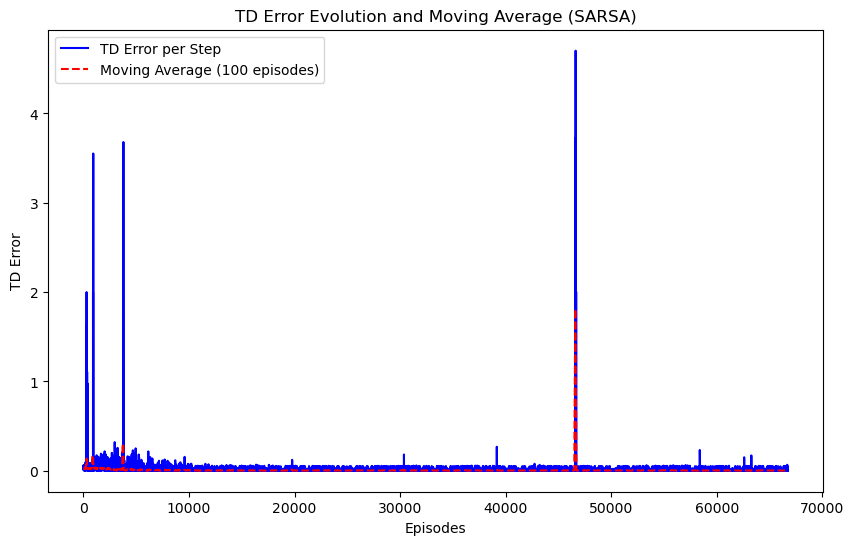

In [25]:
######################## SOLUCIÓ ###########################
import matplotlib.pyplot as plt

#Moving average 100 episodes 
moving_average = np.convolve(deltas, np.ones(100)/100, mode='valid')

#TD error evolution plot
plt.figure(figsize=(10, 6))
plt.plot(deltas, label='TD Error per Step', color='blue')
plt.plot(moving_average, label='Moving Average (100 episodes)', color='red', linestyle='dashed')
plt.xlabel('Episodes')
plt.ylabel('TD Error')
plt.title('TD Error Evolution and Moving Average (SARSA)')
plt.legend()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1.3</strong> (0.25 pts)
Imprimir la política trobada amb el mètode SARSA per a cada estat (podeu re-utilitzar la funció creada a l'apartat anterior dels mètodes MC). Es tracta d'una política òptima?
</div>

In [26]:
######################## SOLUCIÓ ###########################
print_policy(Q_sarsa, width=4, height=4)

Optimal Policy based on Q-values

Down Left Left Down
Down None None Down
Down None None Down
Right Right Right Stay


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>

Reutilitzem la funció ```print_policy()``` anterior però en aquest cas utilitzant el paràmetre ```Q_sarsa```. La política trobada amb SARSA és coherent amb els objectius del problema i pot considerar-se òptima o propera a l'òptima. Això dependrà de factors com el nombre d'episodis, la taxa d'aprenentatge i l'estratègia d'exploració. 
    
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4.1.4</strong> (0.25 punts)
Executar un episodi amb la política trobada i mostrar la trajectòria de l'agent i el retorn obtingut. Comentar els resultats.
</div>

In [27]:
######################## SOLUCIÓ ###########################
execute_episode(Q_sarsa,env)


Agent's trajectory:
State: 0, Action: 1, Reward: -0.1
State: 4, Action: 1, Reward: -0.1
State: 8, Action: 1, Reward: -0.1
State: 12, Action: 2, Reward: -0.1
State: 13, Action: 2, Reward: -0.1
State: 14, Action: 2, Reward: -0.1
State: 15, Action: 4, Reward: 1.0

Total return for the episode: 0.4


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>

Reutilitzem la funció ```execute_episode()``` anterior però en aquest cas utilitzant el paràmetre ```Q_sarsa```. 

El resultat és idèntic a l'obtingut utilitzant el mètode de Montecarlo. L'agent ha seguit la política apresa per assolir l'estat objectiu amb un retorn acumulat positiu. Aquesta trajectòria i retorn demostren que fent ús de SARSA ha estat capaç de trobar una política que sembla ser òptima o propera a òptima. 

    
</div>

### 4.2. Mètode Q-Learning (1.5 punts)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.2.1</strong> (0.75 pts)

Implementar l'algoritme *Q-learning* explicat al mòdul 6 "Aprenentatge per Diferència Temporal" y executar-lo utilizant els següents paràmetres:
<ul>    
    <li>Número de episodios = 5.000</li>
    <li>learning rate = 0,4</li>
    <li>discount factor = 1</li>
    <li>epsilon = 0,5</li>
    <li>epsilon decay = 0,9</li>
    <li>mínim valor d'epsilon = 0,05</li>
</ul>
Actualitzar el valor d'epsilon segons: $$\textrm{max}(\epsilon · \epsilon_{\textrm{decay}}, \epsilon_{\textrm{min}})$$
    </div>

In [28]:
env = gym.make("Gym-Gridworlds/Ex2-4x4-v0", render_mode=None)

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Discrete(16) 


In [29]:
######################## SOLUCIÓ ###########################
import numpy as np
import gymnasium as gym
from collections import defaultdict

# Q-learning Algorithm
def qLearning(env, num_episodes, learning_rate, discount_factor, epsilon, epsilon_decay, epsilon_min):
    #init Qtable
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    #Store deltas
    deltas = []

    #Loop though episodes
    for episode_num in range(1, num_episodes + 1):
        state, _ = env.reset()  #reset env
        done = False
        episode_td_error = [] #current episode td error

        #run episode
        while not done:
            #Select action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample() #Random action
            else:
                action = np.argmax(Q[state]) #Greedy action 
            
            #Execute action
            next_state, reward, terminated, truncated, _ = env.step(action)
            
            #Updata Qvalue using qLearning rule
            old_q_value = Q[state][action] #Save qvalue to compute delta
            best_next_action = np.argmax(Q[next_state]) #Take best action for the next state
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][best_next_action] - old_q_value)
            
            #Calculate and store the TD error
            td_error = abs(Q[state][action] - old_q_value)
            episode_td_error.append(td_error)
            
            #update current state
            state = next_state
            
            #Check if episode completed
            done = terminated or truncated
        
        #Append max TD error for this episode
        deltas.append(np.max(episode_td_error))
        
        #update epsilon
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        
        #Print progress
        if episode_num % 1000 == 0:
            print(f"Episode {episode_num}/{num_episodes} completed.")

    #optimal policy based on Qtable
    print("\nOptimal policy based on Q-learning:")
    optimal_policy = {state: np.argmax(actions) for state, actions in Q.items()}
    for state, action in optimal_policy.items():
        print(f"State {state}: Action {action}")
    
    return Q, deltas

In [30]:
######################## SOLUCIÓ ###########################
# Parameters
num_episodes = 5000
learning_rate = 0.4
gamma = 1.0  #discount factor
initial_epsilon = 0.5
epsilon_decay = 0.9
epsilon_min = 0.05

#init epsilon
epsilon = initial_epsilon

In [31]:
######################## SOLUCIÓ ###########################
Q_qlearning, deltas = qLearning(env, num_episodes, learning_rate, gamma, epsilon, epsilon_decay, epsilon_min)

Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Episode 5000/5000 completed.

Optimal policy based on Q-learning:
State 0: Action 1
State 4: Action 1
State 1: Action 0
State 2: Action 0
State 3: Action 0
State 7: Action 1
State 8: Action 1
State 12: Action 2
State 13: Action 2
State 14: Action 2
State 15: Action 4
State 11: Action 1


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4.2.2</strong> (0.25 pts)
Imprimir una gràfica amb l'evolució del més gran error TD de cada episodi. Atès que l'error té molta variància, imprimiu també la mitjana mòbil amb una finestra temporal de 100 episodis.
</div>

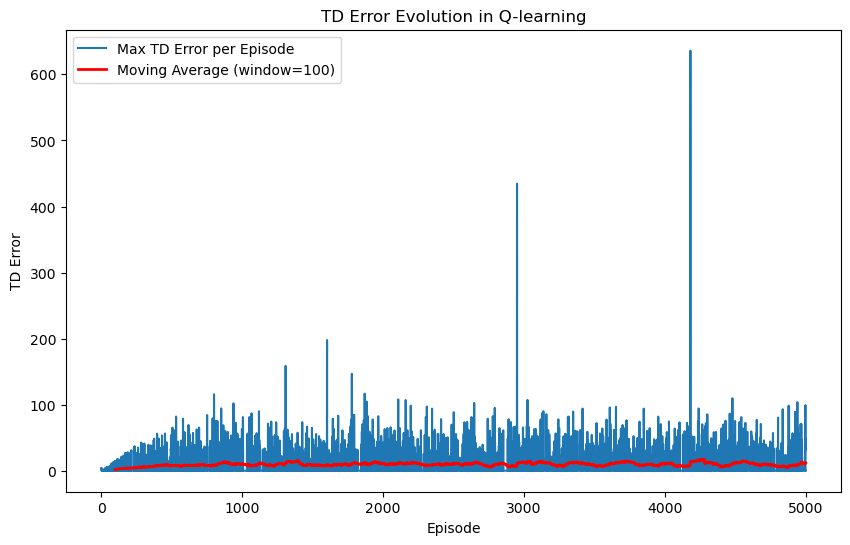

In [32]:
######################## SOLUCIÓ ###########################
import matplotlib.pyplot as plt

#Moving average 100 episodes 
window_size = 100
moving_avg_td_errors = np.convolve(deltas, np.ones(window_size)/window_size, mode='valid')

#TD error evolution plot and moving average
plt.figure(figsize=(10, 6))
plt.plot(deltas, label='Max TD Error per Episode')
plt.plot(np.arange(window_size - 1, num_episodes), moving_avg_td_errors, label=f'Moving Average (window={window_size})', color='red', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('TD Error')
plt.title('TD Error Evolution in Q-learning')
plt.legend()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.2.3</strong> (0.25 pts)
Imprimir la política trobada amb el mètode Q-learning per a cada estat (podeu re-utilitzar la funció creada a l'apartat anterior). Es tracta d'una política òptima?
</div>

In [33]:
######################## SOLUCIÓ ###########################
print_policy(Q_qlearning, width=4, height=4)

Optimal Policy based on Q-values

Down Left Left Left
Down None None Down
Down None None Down
Right Right Right Stay


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>
    
La política trobada sembla coherent amb un entorn en què l'agent ha après a moure's cap a les zones més favorables. Tot i que la política sembla correcta per a molts estats, aquesta depenent de l'execució va variant i en alguns casos obtenim una ```optimal_policy``` que dista del que un pot pensar de primeres en alguns dels estats. 
    
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4.2.4</strong> (0.25 punts)
Executar un episodi amb la política trobada i mostrar la trajectòria de l'agent i el retorn obtingut. Comentar els resultats.
</div>

In [34]:
######################## SOLUCIÓ ###########################
execute_episode(Q_qlearning,env)


Agent's trajectory:
State: 0, Action: 1, Reward: -0.1
State: 4, Action: 1, Reward: -0.1
State: 8, Action: 1, Reward: -0.1
State: 12, Action: 2, Reward: -0.1
State: 13, Action: 2, Reward: -0.1
State: 14, Action: 2, Reward: -0.1
State: 15, Action: 4, Reward: 1.0

Total return for the episode: 0.4


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>

En executar l'episodi (múltiples vegades) amb la política trobada, desemboquem en el resultat que hem obtingut utilitzant tots els altres mètodes. Recompensa total acumulada de l'episodi és un valor positiu de ```0.4```.    
    
</div>

## 5. Comparativa dels algoritmes (0.5 punts)

En aquest apartat farem una petita comparativa dels mètodes programats en els apartats anteriors.

Compararem el comportament dels algoritmes en termens de la política assolida, la duració de l'entrenament i el factor de descompte.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 5.1 - Anàlisi de les polítiques obtingudes i del temps de convergència</strong> (0,25 punts)

Realitzar un estudi de les polítiques obtingudes responent a les següents preguntes:
<ul>
  <li>Tots els algoritmes aconsegueixen arribar a la política òptima?</li>
  <li>Triguen el mateix temps en convergir?</li>
  <li>A què poden ser degudes les diferències?</li>
</ul>
<b>Nota: Es recomana executar cada algoritme diverses vegades per extreure unes conclusions més consistents.</b>
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONS:</strong>

### 1. Política òptima

Anàlisi realitzat després d'executar diverses vegades cada algorisme.

#### 1.1 SARSA 

Algorisme basat en el control d'estratègies per aprendre la política òptima, però depèn de la política d'exploració (epsilon-greedy). 

La quantitat més gran de vegades s'arriba a una política òptima. En alguna de les execucions, alguns estats podien tenir alguna variació. Es pot quedar atrapat en una política subòptima a causa de les accions seleccionades durant la fase d'explotació.

#### 1.2 Q-Learning

Algorisme basat en la política de valor que utilitza el valor màxim de la funció ```Q``` en l'estat següent per actualitzar la taula de ```Q-values```. No depèn de l'estratègia seguida en l'exploració de l'entorn. Igual que en el cas de SARSA, la major quantitat de vegades arriba a una política òptima, tot i que en algunes execucions, alguns estats podien tenir alguna variació.

### 2. Convergència

#### 2.1 SARSA 

SARSA actualitza la taula Q a mesura que l'agent segueix una política específica (epsilon-greedy), la qual cosa significa que, en gran part del temps, l'agent explora l'entorn. Això desemboca en què SARSA necessiti un nombre d'episodis més gran per convergir completament. 

#### 2.2 Q-Learning

Q-Learning, és més directe en el càlcul de la política òptima, ja que sempre utilitza l'acció que maximitza el valor Q en l'estat següent. Això fa que, Q-Learning convergeixi més ràpidament a la política  òptima en comparació amb SARSA.
 

### 3. Diferències

#### Exploració vs Explotació

SARSA utilització una política ```epsilon-greedy```, la qual cosa implica que l'agent explora accions subòptimes durant l'aprenentatge. Per altra banda, Q-learning fa una explotació més directa a través de la selecció de la millor acció en cada estat. El fa més eficient en termes de convergència cap a la política òptima.

#### Èpsilon i Decaïment

La taxa de canvi d'èpsilon té un gran impacte en el temps de convergència pels dos mètodes. 

SARSA és més sensible a la configuració d'èpsilon i la seva disminució. Un decaïment més ràpid d'èpsilon en SARSA pot limitar l'exploració, mentre que un decaïment més lent pot allargar el procés d'aprenentatge.

Q-learning pot ser més robust a aquests canvis perquè sempre utilitza la millor acció en el següent estat.
    
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 5.2 - Influència del factor de descompte (discount factor)</strong> (0,25 punts)

Tots els agents s'han entrenat amb recompenses sense descomptar (factor de descompte = 1). A què creus que es deu aquesta elecció? Creus que millorarien els resultats si s'utilitza un factor de descompte diferent? Per què? En cas afirmatiu, selecciona un nou factor de descompte i testeja'l a algun dels algortimes (per exemple a Q-learning).
</div>

In [37]:
#SOLUCIÓ
#New Q-learning parameters
num_episodes = 5000
learning_rate = 0.4
gamma = 0.9  #discount factor
init_epsilon = 0.5
epsilon_decay = 0.9
epsilon_min = 0.05
#init epsilon
epsilon = init_epsilon 

#Init env
env = gym.make("Gym-Gridworlds/Ex2-4x4-v0", render_mode=None)
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Q_qlearning_C, deltas_C = qLearning(env, num_episodes, learning_rate, gamma, epsilon, epsilon_decay, epsilon_min)

print("\nOptimal Policy based on Q-learning with gamma=0.9:")
print_policy(Q_qlearning_C, width=4, height=4)

Action space is Discrete(5) 
Observation space is Discrete(16) 
Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Episode 5000/5000 completed.

Optimal policy based on Q-learning:
State 0: Action 1
State 4: Action 1
State 8: Action 1
State 1: Action 0
State 12: Action 2
State 13: Action 2
State 14: Action 2
State 15: Action 4
State 2: Action 4
State 3: Action 4
State 7: Action 1
State 11: Action 1

Optimal Policy based on Q-learning with gamma=0.9:
Optimal Policy based on Q-values

Down Left Stay Stay
Down None None Down
Down None None Down
Right Right Right Stay


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONS:</strong>
    
El factor de descompte és un paràmetre important en els algoritmes d'aprenentatge per reforç. En aquest cas, s'ha optat per un factor de descompte d'1, la qual cosa implica que l'agent considera totes les recompenses futures com igual d'importants que les recompenses immediates. Això pot ser adequat per a problemes a llarg termini, on l'objectiu és aconseguir el millor retorn possible en tots els passos de l'episodi, independentment de quan es produeixin les recompenses.

L'elecció d'un factor de descompte més petit podria comportar canvis importants en el comportament de l'agent, ja que faria que aquest prioritzés més les recompenses immediates, en lloc de considerar només les recompenses futures. A la vegada, un factor de descompte molt més petit podria fer que l'agent focalitzi massa les recompenses properes deixant de banda els resultats a llarg termini.

Segons sembla, fer servir un factor de descompte de ```0.9``` es troba bastant balancejat entre les recompenses immediates i futures, tot i això, tampoc sembla que acabi retornant una política òptima.
</div>

## 6. Diferència de polítiques entre SARSA i Q-Learning (1.5 punts)

En aquest darrer apartat dissenyarem un entorn una mica més complicat i compararem les diferents polítiques que assoleixen els mètodes SARSA i Q-learning.

Per a això es demana:


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 6.1</strong> (0,5 punts)

Crear un entorn nou amb una graella 5x5 com la que s'observa a continuació (utilitzeu <code>"5X5_Ex6"</code> com a clau de l'entrada al diccionari <code>GRIDS</code>.):
<br><br>
<img src="images/Gym-Gridworld_Ex6_5x5.png" alt="Mi imagen" style="display: block; margin-left: auto; margin-right: auto;">
<br>
Fixeu-vos que la casella inicial no es troba a dalt a l'esquerra si no a la meitat de la primera columna. Per a aconseguir això heu de crear una sub-classe de la classe <code>Gridworld</code> i afegir-la al final de l'arxiu <code>\gym_gridworlds\gridworld.py</code> (en el mateix arxiu teniu algun exemple).

Enrecordeu-vos de registrar l'entorn a l'arxiu <code>\gym_gridworlds\\\_\_init\_\_.py</code> amb els paràmetres pertinents (fixeu-vos en altres registres com es crida a una sub-classe), reiniciar el kernel del Notebook i tornar a importar els paquets.

L'entorn s'ha de poder cridar amb el següent codi:

</div>

In [38]:
env = gym.make("Gym-Gridworlds/Ex6-5x5-v0", render_mode="human")
env.reset()
env.render()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Discrete(25) 


In [39]:
env.close()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 6.2 - Entrenament i comparativa dels agents</strong> (1 punt)

<ol>
  <li>Entrena els 2 agents TD (SARSA i Q-learning) en el nou entorn. Ajusta els diferents paràmetres fins que els algoritmes convergeixin.</li>
  <li>Imprimeix per pantalla la política assolida per cada agent.</li>
  <li>Executa un episodi amb cada política i mostra els resultats (accions, recorregut i recompensa total).</li>
  <li>Comenta els resultats. Són els resultats esperats?</li>
</ol>

</div>

In [40]:
env = gym.make("Gym-Gridworlds/Ex6-5x5-v0", render_mode=None)

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Discrete(25) 


In [41]:
%%time
######################## SOLUCIÓ ###########################
#Entrenament SARSA
Q_sarsa, deltas = Q_sarsa, deltas_sarsa = sarsaAlgorithm(env, num_episodes, learning_rate, gamma, epsilon, epsilon_decay, epsilon_min)

Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Episode 5000/5000 completed.

Optimal policy based on SARSA:
State 10: Action 3
State 5: Action 2
State 15: Action 3
State 21: Action 2
State 20: Action 4
State 16: Action 1
State 22: Action 2
State 23: Action 2
State 17: Action 2
State 12: Action 4
State 0: Action 1
State 1: Action 0
State 2: Action 3
State 3: Action 0
State 24: Action 1
State 18: Action 2
State 19: Action 1
State 4: Action 0
State 9: Action 3
State 14: Action 1
State 13: Action 1
CPU times: total: 5.27 s
Wall time: 5.52 s


In [42]:
%%time
######################## SOLUCIÓ ###########################
#Entrenament Q-learning
Q_qlearning, deltas_qlearning = qLearning(env, num_episodes, learning_rate, gamma, epsilon, epsilon_decay, epsilon_min)

Episode 1000/5000 completed.
Episode 2000/5000 completed.
Episode 3000/5000 completed.
Episode 4000/5000 completed.
Episode 5000/5000 completed.

Optimal policy based on Q-learning:
State 10: Action 1
State 15: Action 1
State 20: Action 2
State 21: Action 2
State 16: Action 0
State 5: Action 1
State 0: Action 1
State 1: Action 2
State 2: Action 2
State 3: Action 2
State 22: Action 2
State 17: Action 3
State 12: Action 4
State 23: Action 3
State 18: Action 3
State 24: Action 3
State 13: Action 0
State 4: Action 1
State 9: Action 1
State 14: Action 0
State 19: Action 3
CPU times: total: 750 ms
Wall time: 814 ms


In [43]:
######################## SOLUCIÓ ###########################
#Política SARSA
print("\nOptimal Policy based on SARSA:")
print_policy(Q_sarsa, width=5, height=5)


Optimal Policy based on SARSA:
Optimal Policy based on Q-values

Down Left Up Left Left
Right None None None Up
Up None Stay Down Down
Up Down Right Right Down
Stay Right Right Right Down


In [44]:
######################## SOLUCIÓ ###########################
#Execució episodi SARSA
print("\nExecuting episode with SARSA policy:")
execute_episode(Q_sarsa, env)


Executing episode with SARSA policy:

Agent's trajectory:
State: 10, Action: 3, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, Reward: -0.1
State: 5, Action: 2, R

In [45]:
######################## SOLUCIÓ ###########################
#Política O-learning
print("\nOptimal Policy based on Q-learning:")
print_policy(Q_qlearning, width=5, height=5)


Optimal Policy based on Q-learning:
Optimal Policy based on Q-values

Down Right Right Right Down
Down None None None Down
Down None Stay Left Left
Down Left Up Up Up
Right Right Right Up Up


In [46]:
######################## SOLUCIÓ ###########################
#Execució episodi Q-learning
print("\nExecuting episode with Q-learning policy:")
execute_episode(Q_qlearning, env)


Executing episode with Q-learning policy:

Agent's trajectory:
State: 10, Action: 1, Reward: -0.1
State: 15, Action: 1, Reward: -0.1
State: 20, Action: 2, Reward: -0.1
State: 21, Action: 2, Reward: -0.1
State: 22, Action: 2, Reward: -0.1
State: 23, Action: 3, Reward: -0.1
State: 18, Action: 3, Reward: -0.1
State: 13, Action: 0, Reward: -0.1
State: 12, Action: 4, Reward: 1.0

Total return for the episode: 0.20000000000000007


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONS:</strong>
<br><br>

Després d'executar ambdós algorismes en un mateix entorn i amb els mateixos paràmetres d'entrada, podem extreure les següents conclusions comparatives.

##### Convergència i exploració

L'algorisme Q-learning tendeix a convergir més ràpidament i de manera més eficient, ja que actualitza la ```Q-value``` per les millors accions possibles, independentment de les accions que prengui l'agent durant l'entrenament. SARSA, per altra banda, segueix una estratègia més lenta i conservadora, actualitzant la ```Q-value``` d'acord amb les accions realment preses durant l'episodi, fet que provoca que l'agent es quedi atrapat amb certes accions subòptimes. 

##### Recompenses

L'agent de Q-learning ha obtingut una recompensa total positiva de ```(0.2)```, indicant que ha trobat un camí parcialment eficient. L'agent de SARSA ha quedat atrapat en un patró de recompenses negatives, inidicant d'aquesta manera una falta d'exploració efectiva.

##### Comportament esperat

Els resultats de SARSA no són els esperats donat que l'agent queda presoner de les accions 'Stay' i no aconsegueix una recompensa significativa. Els resultats de Q-learning són més propers als esperats, explorant l'entorn de manera més efectiva i rebent una recompensa positiva. 
 
</div>